In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv files
df=pd.read_csv('winequality-red.csv',sep=';')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

# Data Exploration (exploratory data analysis or EDA)


In [3]:
#Display The head ==> To Check if Data is Properly Imported
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
#To check the shape of the dataset
df.shape # (rows, columns)

(1599, 12)

In [5]:
#features in data
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#checking datatypes
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#Lets describe the dataset
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [9]:
# Are there any missing values?
df.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of fixed acidity : 96
number of unique valuse of volatile acidity : 143
number of unique valuse of citric acid : 80
number of unique valuse of residual sugar : 91
number of unique valuse of chlorides : 153
number of unique valuse of free sulfur dioxide : 60
number of unique valuse of total sulfur dioxide : 144
number of unique valuse of density : 436
number of unique valuse of pH : 89
number of unique valuse of sulphates : 96
number of unique valuse of alcohol : 65
number of unique valuse of quality : 6


In [11]:
# check for duplicates
print('sum of duplicated values{}\n'.format(df.duplicated().sum()))

sum of duplicated values240



In [12]:
#drop duplictes values
df.drop_duplicates(inplace=True)
df.shape

(1359, 12)

In [13]:
#lets check the correlation matrix
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   

                       alcohol   quality  
fixed acidity        -0.061596  0.119024  
volatile acidity     -0.197812 -0.395214  
citric acid           0.105108  0.228057  
residual sugar        0.063281  0.013640  
chlorides            -0.223824 -0.130988  
free sulfur dioxide  -0.080125 -0.050463  
total sulfur dioxide -0.217829 -0.177855  
density              -0.504995 -0.184252  
pH                    0.213418 -0.055245  
sulphates             0.091621  0.248835  
alcohol               1.000000  0.480343  
quality               0.480343  1.000000

# Univariate  Analysis

In [14]:
# Let's find out how many of each class there
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [15]:
#quality percentage in dataset
print('Percentage',df.quality.value_counts(normalize=True))

Percentage 5    0.424577
6    0.393672
7    0.122884
4    0.038999
8    0.012509
3    0.007358
Name: quality, dtype: float64


Text(0.5, 6.79999999999999, '0 = No claim , 1 = Claim')

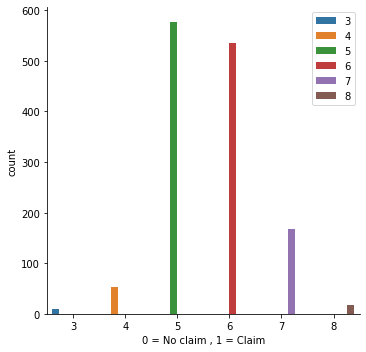

In [16]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='quality',data=df,kind='count',hue='quality')
plt.legend()
plt.xlabel("0 = No claim , 1 = Claim")
#here we we see data is imbalanced but all the classes have significant number of instances

We can see that most of the quality of wines is 5 and 6 in the dataset 


fixed acidity               AxesSubplot(0.125,0.71587;0.227941x0.16413)
volatile acidity         AxesSubplot(0.398529,0.71587;0.227941x0.16413)
citric acid              AxesSubplot(0.672059,0.71587;0.227941x0.16413)
residual sugar             AxesSubplot(0.125,0.518913;0.227941x0.16413)
chlorides               AxesSubplot(0.398529,0.518913;0.227941x0.16413)
free sulfur dioxide     AxesSubplot(0.672059,0.518913;0.227941x0.16413)
total sulfur dioxide       AxesSubplot(0.125,0.321957;0.227941x0.16413)
density                 AxesSubplot(0.398529,0.321957;0.227941x0.16413)
pH                      AxesSubplot(0.672059,0.321957;0.227941x0.16413)
sulphates                     AxesSubplot(0.125,0.125;0.227941x0.16413)
alcohol                    AxesSubplot(0.398529,0.125;0.227941x0.16413)
quality                    AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

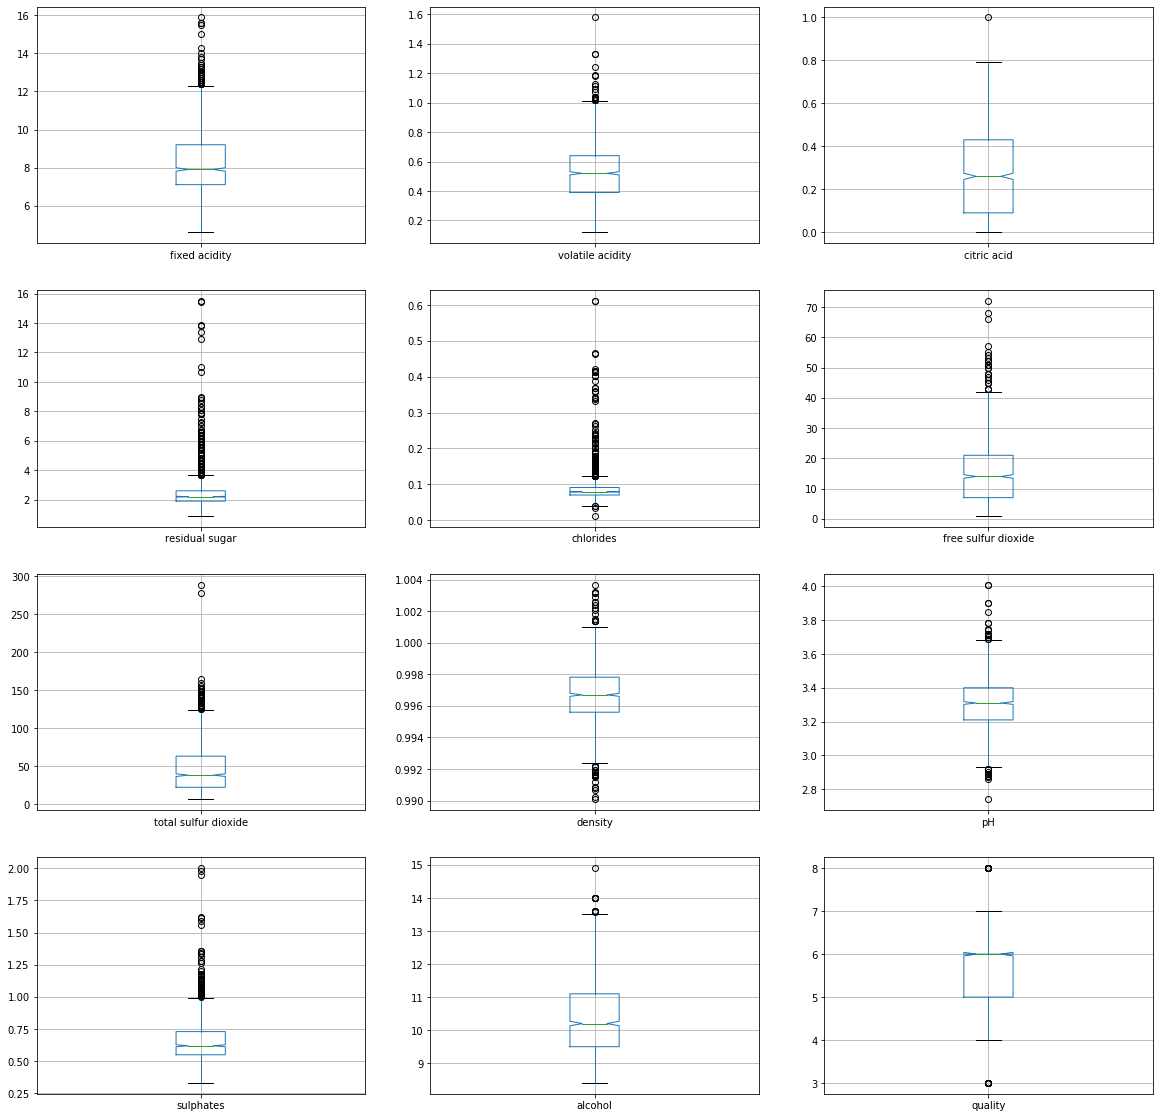

In [17]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(4,3),figsize=(20,20),grid=True,notch=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D4D569508>,
      dtype=object)

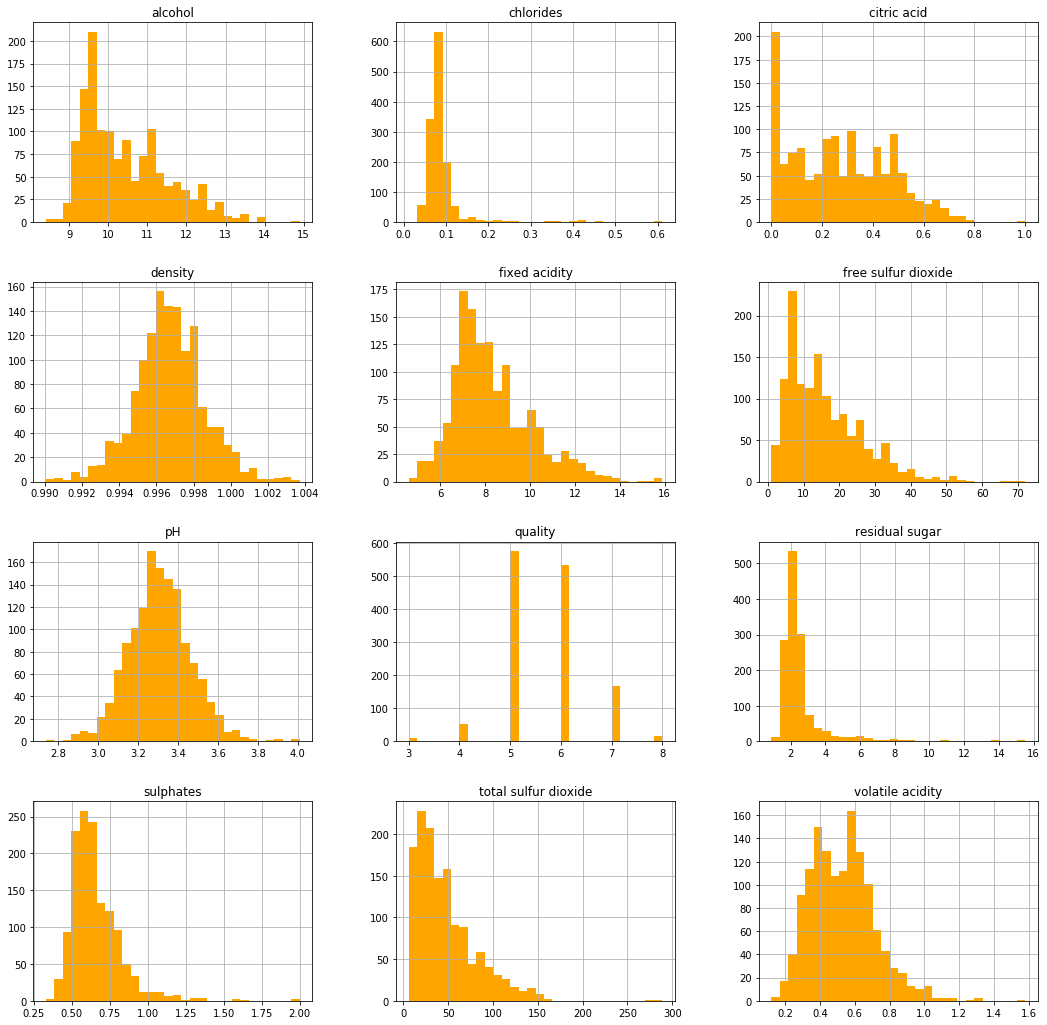

In [18]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(4,3),bins=30,color='orange')

# Bivariate  Analysis

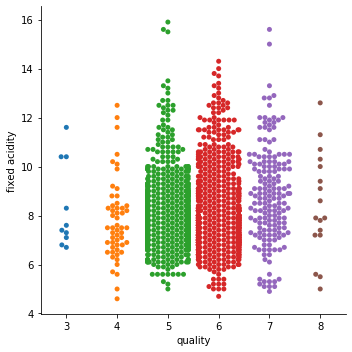

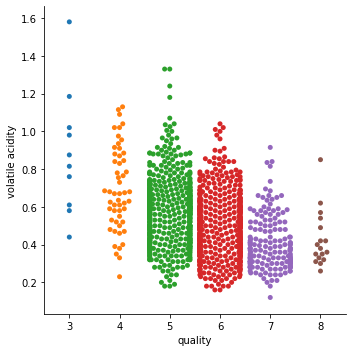

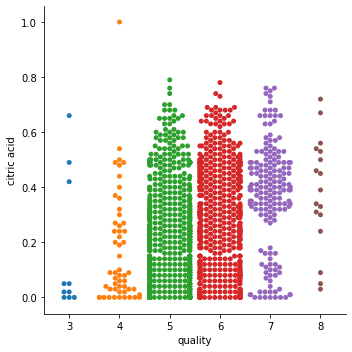

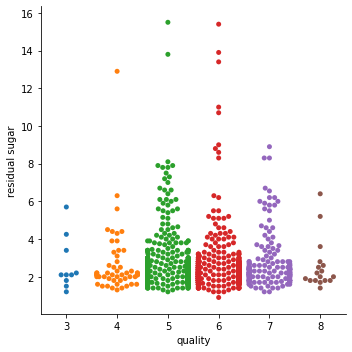

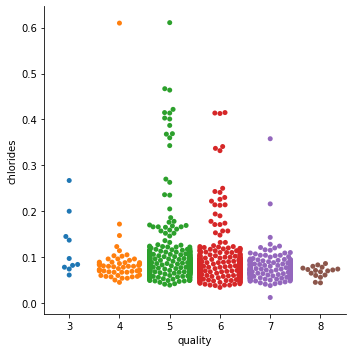

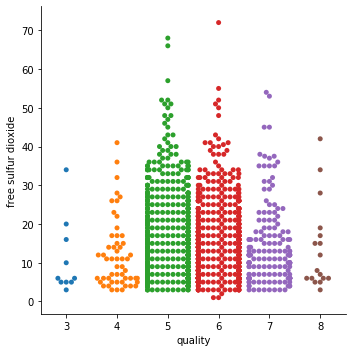

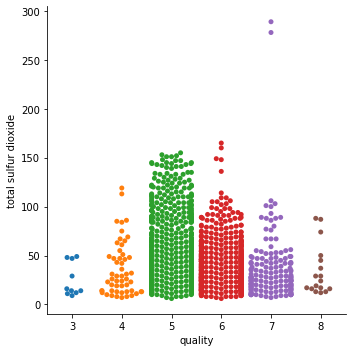

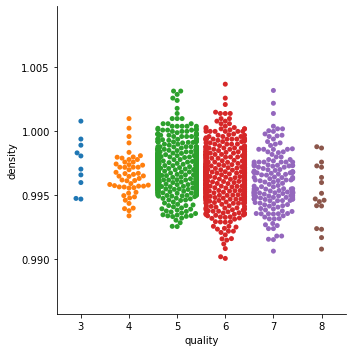

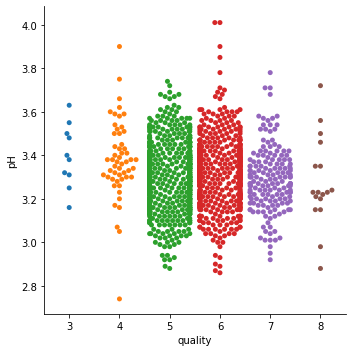

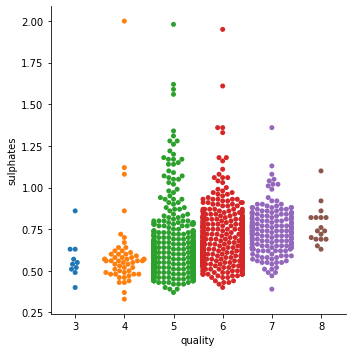

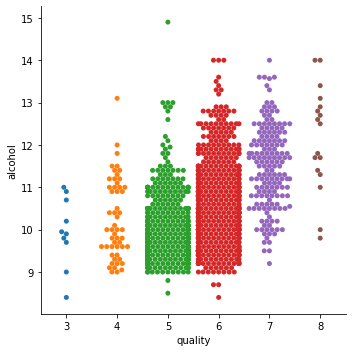

In [19]:
'''lets compare the quality vs 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'.
'''
m=df.drop(['quality'],axis=1).columns.values
for i in m:
    sns.catplot(x="quality", y=i, data=df,kind="swarm");
    plt.tight_layout()


In [20]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
df['quality']=np.where(df['quality']>=7,'Good','Not Good')


In [21]:
#let check 10 starting value after conversion of quality in terms of good or bad
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4              0.70         0.00             1.9      0.076   
1             7.8              0.88         0.00             2.6      0.098   
2             7.8              0.76         0.04             2.3      0.092   
3            11.2              0.28         0.56             1.9      0.075   
5             7.4              0.66         0.00             1.8      0.075   
6             7.9              0.60         0.06             1.6      0.069   
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
9             7.5              0.50         0.36             6.1      0.071   
10            6.7              0.58         0.08             1.8      0.097   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  11.0                  34.0   0.9978  3.51       0.56   
1                  25.0                  67.0   0.9968  3.20       0.68   
2                  15.0                  54.0   0.9970  3.26       0.65   
3                  17.0                  60.0   0.9980  3.16       0.58   
5                  13.0                  40.0   0.9978  3.51       0.56   
6                  15.0                  59.0   0.9964  3.30       0.46   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   

    alcohol   quality  
0       9.4  Not Good  
1       9.8  Not Good  
2       9.8  Not Good  
3       9.8  Not Good  
5       9.4  Not Good  
6       9.4  Not Good  
7      10.0      Good  
8       9.5      Good  
9      10.5  Not Good  
10      9.2  Not Good

In [22]:
# using Label Encoding to change the value in binary format
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['quality'])
df['quality']=le.transform(df['quality'])
df
# Here  Good= 0, Not Good=1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        1  
1         9.8        1  
2         9.8        1  
3         9.8        1  
5         9.4        1  
...       ...      ...  
1593      9.5        1  
1594     10.5        1  
1595     11.2        1  
1597     10.2        1  
1598     11.0        1  

[1359 rows x 12 columns]

In [23]:
df['quality'].value_counts()


1    1175
0     184
Name: quality, dtype: int64

Text(0.5, 6.79999999999999, '0 = Good , 1 = Not Good')

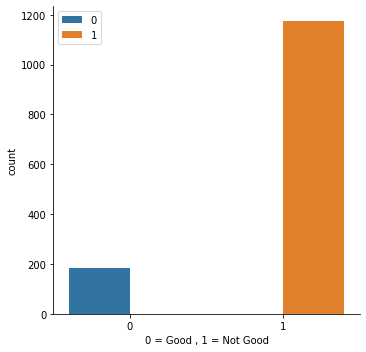

In [24]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='quality',data=df,kind='count',hue='quality')
plt.legend()
plt.xlabel("0 = Good , 1 = Not Good")
#here we we see data is imbalanced but both the classes have significant number of instances
# Good Quality Wines are less in number

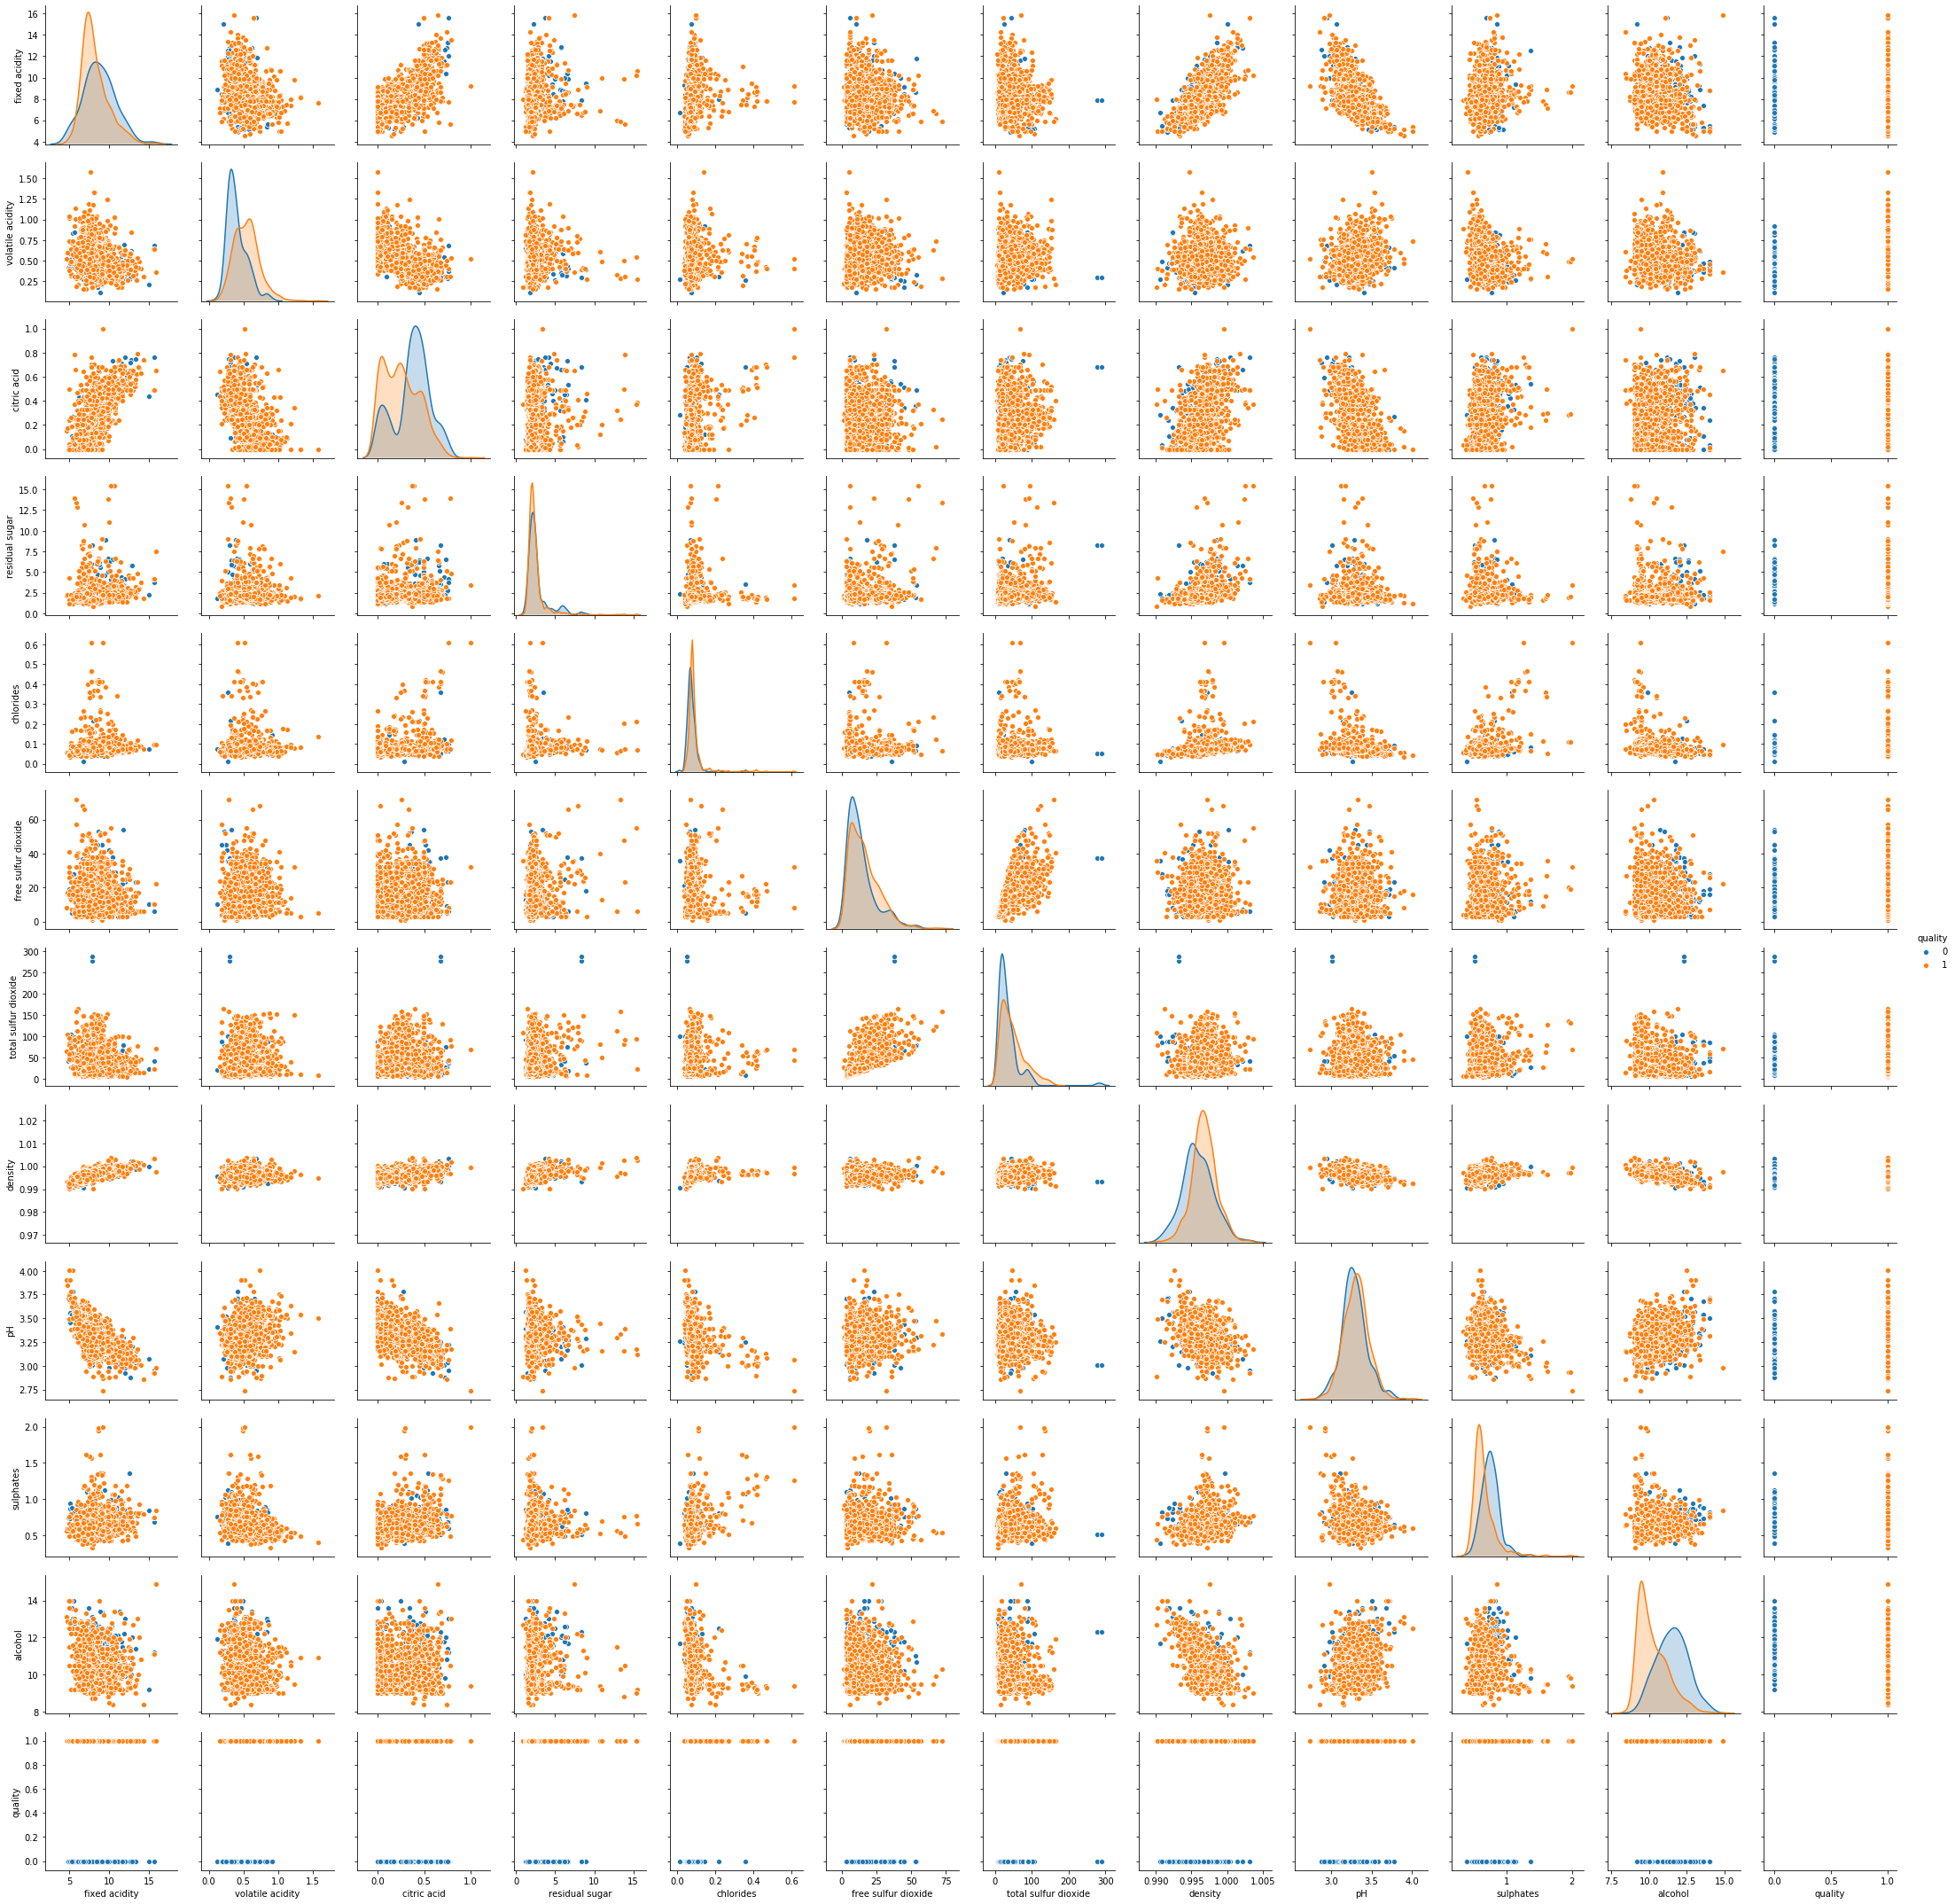

In [25]:
# Plotting the pairplot to analyze correlation between fields
sns.pairplot(df,hue='quality')

In [26]:
#checking skewness values
df.skew()
#From below output it is clear that skewness exist

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                -2.133662
dtype: float64

In [27]:
#lets remove the skewness
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [28]:
#lets again check the skewness
df.skew()

fixed acidity           0.411520
volatile acidity        0.331421
citric acid             0.312726
residual sugar          2.217472
chlorides               4.927737
free sulfur dioxide    -0.090901
total sulfur dioxide   -0.035459
density                 0.044778
pH                      0.232032
sulphates               1.629700
alcohol                 0.679095
quality                -2.133662
dtype: float64

skewness still exist because of outliers

In [29]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)#shape of dataset before outliers remove
df_wine=df.loc[(z<3).all(axis=1)]
print(df_wine.shape)#shape of dataset after outliers removed

(1359, 12)
(1263, 12)


In [30]:
#lets again check the skewness after removing outliers
df_wine.skew()

fixed acidity           0.434309
volatile acidity        0.192467
citric acid             0.280400
residual sugar          1.412757
chlorides               2.062324
free sulfur dioxide    -0.067068
total sulfur dioxide   -0.037201
density                 0.031855
pH                      0.090914
sulphates               0.775269
alcohol                 0.601384
quality                -2.143796
dtype: float64

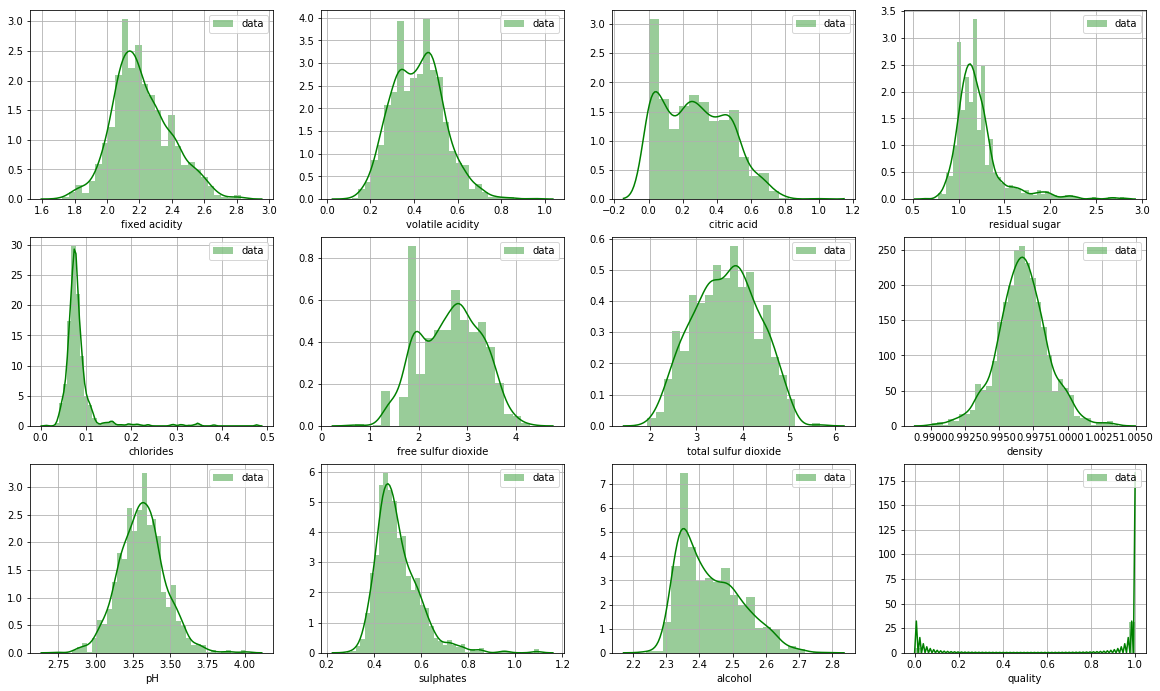

In [31]:
# Checking the Normal Distribution using distplot after removing outliers
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

(12.0, 0.0)

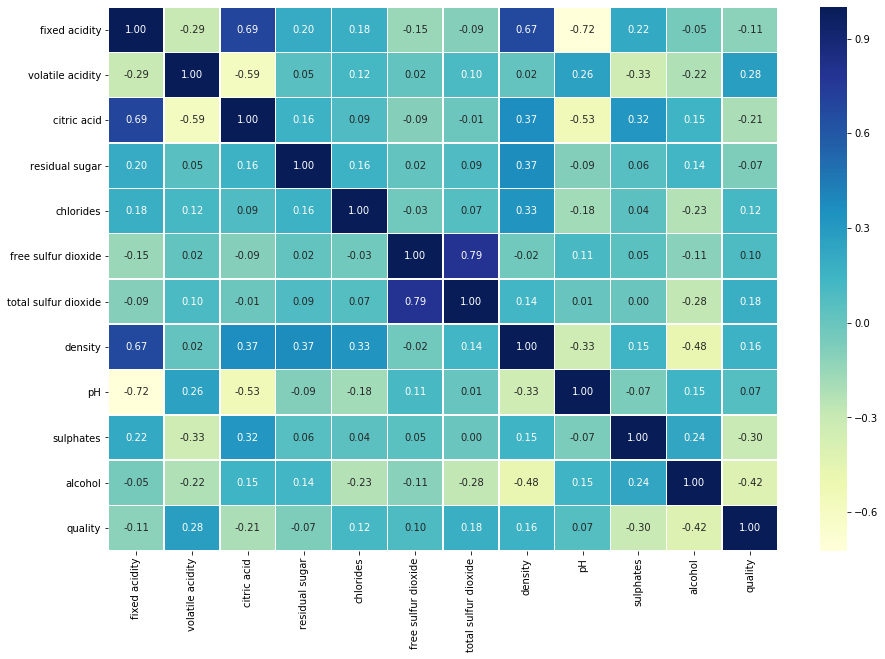

In [32]:
# Plotting Heatmap for Correlation
corr_matrix = df_wine.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modeling


In [33]:
# Split data into X and y
X = df_wine.drop("quality", axis=1)

y = df_wine["quality"]

In [34]:
# Independent variables (no target column)
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.128232          0.530628         0.00        1.064711   0.073250   
1       2.174752          0.631272         0.00        1.280934   0.093490   
2       2.174752          0.565314         0.04        1.193922   0.088011   
3       2.501436          0.246860         0.56        1.064711   0.072321   
5       2.128232          0.506818         0.00        1.029619   0.072321   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             2.484907              3.555348   0.9978  3.51   0.444686   
1             3.258097              4.219508   0.9968  3.20   0.518794   
2             2.772589              4.007333   0.9970  3.26   0.500775   
3             2.890372              4.110874   0.9980  3.16   0.457425   
5             2.639057              3.713572   0.9978  3.51   0.444686   

    alcohol  
0  2.341806  
1  2.379546  
2  2.379546  
3  2.379546  
5  2.341806

In [35]:
# Target variable
y


0       1
1       1
2       1
3       1
5       1
       ..
1593    1
1594    1
1595    1
1597    1
1598    1
Name: quality, Length: 1263, dtype: int32

In [36]:
#checking shape of input variable
X.shape

(1263, 11)

In [37]:
#checking shape of target variable
y.shape

(1263,)

In [38]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.512055          0.996663    -1.390892       -0.632998  -0.260159   
1         -0.243159          1.880861    -1.390892        0.408161   0.741331   
2         -0.243159          1.301391    -1.182146       -0.010817   0.470202   
3          1.645147         -1.496364     1.531543       -0.632998  -0.306166   
4         -0.512055          0.787476    -1.390892       -0.801970  -0.306166   
...             ...               ...          ...             ...        ...   
1258      -0.940415          0.573187    -0.973401       -0.632998  -0.629422   
1259      -1.403079          0.464049    -0.973401       -0.469755   0.379494   
1260      -1.649083          0.185123    -0.869028       -0.158989  -0.908189   
1261      -1.649083          0.707729    -0.764656       -0.469755  -0.306166   
1262      -1.565913         -1.292832     1.061866        1.588477  -0.675774   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.233906             -0.083316  0.633492  1.385411   
1                1.029720              0.897625  0.061006 -0.793548   
2                0.236253              0.584251  0.175503 -0.371814   
3                0.428746              0.737177  0.747989 -1.074704   
4                0.018023              0.150375  0.633492  1.385411   
...                   ...                   ...       ...       ...   
1258             1.208184              0.076512 -0.105015  0.752810   
1259             1.419355              0.287867 -1.026716  0.963677   
1260             1.733749              0.501408 -0.900769  1.455700   
1261             1.419355              0.287867 -0.700399  1.807145   
1262             0.517109              0.220720 -0.688950  0.541943   

      sulphates   alcohol  
0     -0.624802 -1.012195  
1      0.319353 -0.585634  
2      0.089793 -0.585634  
3     -0.462503 -0.585634  
4     -0.624802 -1.012195  
...         ...       ...  
1258   1.339118 -0.904036  
1259  -0.462503  0.124176  
1260   0.912030  0.792031  
1261   0.544850 -0.174587  
1262   0.166773  0.605208  

[1263 rows x 11 columns]

In [39]:
#since it is imbalanced dataset so we will focus on auc-roc score.
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.30,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [40]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def maxrandomcore(model,x,y):
    max_acc_score=0
    for acc_state in range(42,100): 
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.30,stratify=y)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy_score1=accuracy_score(y_test,y_pred)
        if accuracy_score1 > max_acc_score:
            max_acc_score=accuracy_score1
            final_acc_state=acc_state
    print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)
    return final_acc_state

In [41]:
# Evaluate the model on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.naive_bayes import MultinomialNB
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "XGBClassifier":XGBClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        acc_state=maxrandomcore(model,x,y)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.30)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [42]:
#learning scores of a model
model_scores = fit_and_score(models=models)

model_scores


max acc score corresponding to 63 is: 0.899736147757256
max acc score corresponding to 69 is: 0.899736147757256
max acc score corresponding to 46 is: 0.9023746701846965
max acc score corresponding to 55 is: 0.899736147757256
max acc score corresponding to 84 is: 0.9050131926121372
max acc score corresponding to 73 is: 0.8680738786279684
max acc score corresponding to 91 is: 0.899736147757256
max acc score corresponding to 47 is: 0.9050131926121372


{'Logistic Regression': 0.8834841628959276,
 'KNN': 0.9117647058823529,
 'Random Forest': 1.0,
 'GaussianNB': 0.8585972850678733,
 'SVC': 0.9106334841628959,
 'DecisionTreeClassifier': 1.0,
 'GradientBoostingClassifier': 0.9683257918552036,
 'XGBClassifier': 1.0}

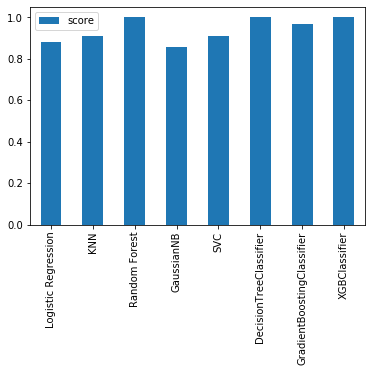

In [43]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

******************** SVC *********************


max acc score corresponding to 84 is: 0.9050131926121372
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy Score= 0.9050131926121372


Cross_val_score= 0.8828125980299895


roc_auc_score =  0.6718974175035868


Classification report
               precision    recall  f1-score   support

           0       0.86      0.35      0.50        51
           1       0.91      0.99      0.95       328

    accuracy                           0.91       379
   macro avg       0.88      0.67      0.72       379
weighted avg       0.90      0.91      0.89       379



[[ 18  33]
 [  3 325]]





******************** Random Forest *********************


max acc score corresponding to 74 is: 0.899736147757256
RandomForestClassifier(bootstrap=T

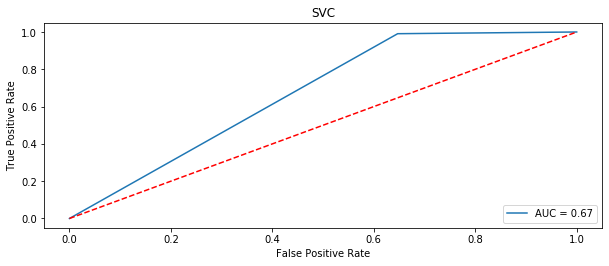

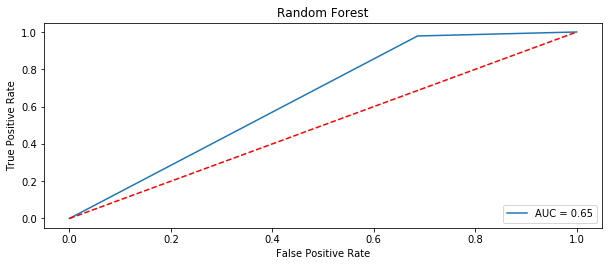

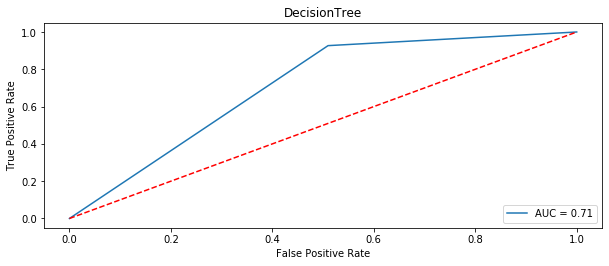

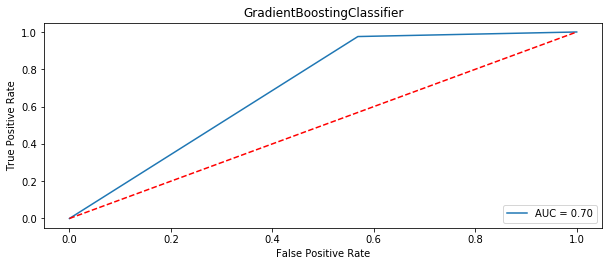

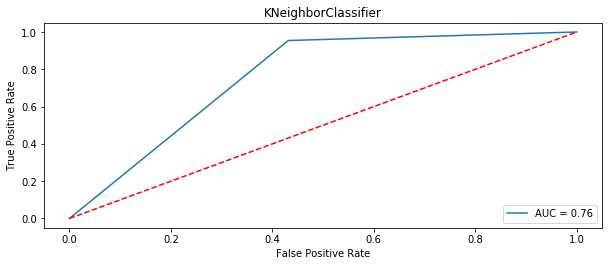

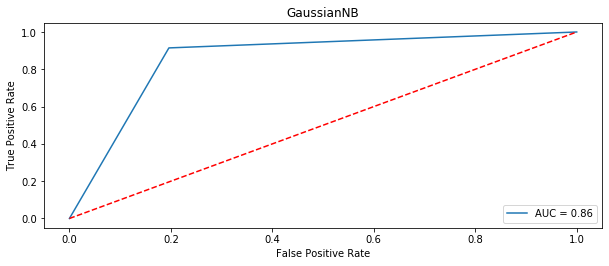

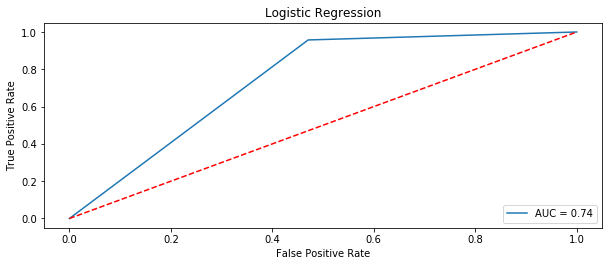

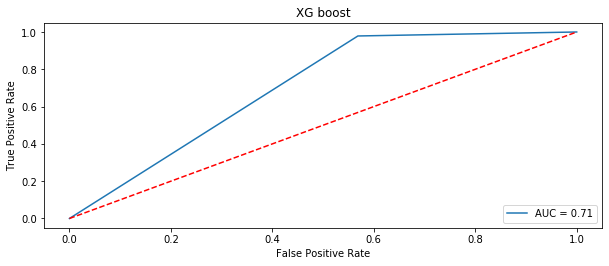

In [44]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("SVC",SVC()))
models.append(("Random Forest",RandomForestClassifier(n_estimators=100)))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("KNeighborClassifier",KNeighborsClassifier(n_neighbors=6)))
models.append(("GaussianNB",GaussianNB()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("XG boost",XGBClassifier()))

Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("********************",name,"*********************")
    print('\n')
    Model.append(name)
    acc_state=maxrandomcore(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.30,stratify=y)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label= 'AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n\n")



In [45]:
#lookover the accuracy_score,Cross_val_score,Roc_auc_curve in a DataFrame which we calculated above
result=pd.DataFrame({'Model':Model,'accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

Model  accuracy_score  Cross_val_score  Roc_auc_curve
0                         SVC       90.501319        88.281260      67.189742
1               Random Forest       88.918206        86.936759      64.619201
2                DecisionTree       86.807388        82.181442      70.851267
3  GradientBoostingClassifier       90.237467        86.223414      70.349115
4         KNeighborClassifier       90.237467        85.823766      76.144787
5                  GaussianNB       89.973615        83.845285      85.927786
6         Logistic Regression       89.973615        87.252337      74.336442
7                    XG boost       90.501319        86.698664      70.501554

In [46]:
#function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

# Hypertunning with Grid Search CV

In [47]:
#for getting best set of parameters for LogisticRegression we will use grid searchCV
from sklearn.model_selection import GridSearchCV
gridR = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"],'penalty':['l1','l2']}


clfR = LogisticRegression()

# Setup GridSearchCV
gs_clfR = GridSearchCV(estimator=clfR,
                      param_grid=gridR,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clfR.fit(x_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished


In [48]:
# best parameters for LogisticRegression
print("Best parameter:",gs_clfR.best_params_)
print("score:",gs_clfR.best_score_)

Best parameter: {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}
score: 0.8834938366718028


In [69]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
clfR = LogisticRegression(C= 0.615848211066026, solver='liblinear',penalty='l1')
print("LogisticRegression accuracy score:",maxrandomcore(clfR,x,y))
print("LogisticRegression roc_auc score:",max_aucroc_score(clfR,x,y))

max acc score corresponding to 63 is: 0.9023746701846965
LogisticRegression accuracy score: 63
max auc roc score corresponding to  55  is  0.8693208990913438
LogisticRegression roc_auc score: 55


In [71]:
#use gridsearchcv to find out best parameters for KNeighborsClassifier
grid_1={'n_neighbors':[3,5,11,19],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
            }
# Setup GridSearchCV
gs_clf1 = GridSearchCV(KNeighborsClassifier(),
                      param_grid=grid_1,
                      cv=5, # 5-fold cross-validation
                      verbose=2,
                      n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf1.fit(x_train, y_train);


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  57 out of  80 | elapsed:    2.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.6s finished


In [72]:
# best parameters for KNeighborsClassifier
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
score: 0.8913841807909604


In [73]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 11, weights='distance')
print("KNeighborsClassifier accuracy score:",maxrandomcore(knn,x,y))
print("KNeighborsClassifier roc_auc score:",max_aucroc_score(knn,x,y))

max acc score corresponding to 52 is: 0.899736147757256
KNeighborsClassifier accuracy score: 52
max auc roc score corresponding to  73  is  0.8312111429937828
KNeighborsClassifier roc_auc score: 73


In [56]:
#lets use gridsearchcv to find out best parameters for XGBClassifier
grid_3 = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05,0.3,0.1,0.08], #so called `eta` value
              'max_depth': range(3,10,2),
              'min_child_weight': range(1,6,2),
              'silent': [1,0],
              'subsample': [0.5,0.6,0.7,0.8,0.9,1],
              'colsample_bytree': [0.7],
              'n_estimators': [5,20,50], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]
         }
clf = XGBClassifier()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clf,
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf3.fit(x_train, y_train);

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, ma

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_dep

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learn

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_ra

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7,

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_ra

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05,

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_r

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_r

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_c

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, 

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_r

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, 

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_d

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, ma

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, 

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, 

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, 

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, ma

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, ma

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learni

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, ma

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learnin

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, lea

[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed:  2.4min finished


In [57]:
#best parameters for XGBClassifier
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'missing': -999, 'n_estimators': 20, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 1}
score: 0.8913906009244993


In [74]:
  #checking accuracy score and roc score using best parameters which calculated from gridsearchCV
xg=XGBClassifier(colsample_bytree=0.7,learning_rate=0.05,max_depth= 3,min_child_weight= 5,missing=-999,n_estimators= 20,nthread= 4,objective= 'binary:logistic',
 seed= 1337,
 silent= 1,
 subsample= 1)
print("XGBClassifier accuracy score:",maxrandomcore(xg,x,y))
print("XGBClassifier roc_auc score:",max_aucroc_score(xg,x,y))

max acc score corresponding to 63 is: 0.9076517150395779
XGBClassifier accuracy score: 63
max auc roc score corresponding to  55  is  0.8760760401721664
XGBClassifier roc_auc score: 55


In [90]:
#lets use gridsearchcv to find out best parameters for SVC
grid_4 = { 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000],'kernel':['linear','poly','rbf']
         }
clf = SVC()

# Setup GridSearchCV
gs_clf4 = GridSearchCV(estimator=clf,
                      param_grid=grid_4,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

gs_clf4.fit(x_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ................. C=10, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

[CV] ............... C=1000, gamma=0.001, kernel=linear, total=  39.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] ............... C=1000, gamma=0.001, kernel=linear, total=  39.9s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   1.8s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] ............... C=1000, gamma=0.001, kernel=linear, total=  18.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] ............... C=1000, gamma=0.001, kernel=linear, total=   3.4s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] ................. C=1000, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] ................. C=1000, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.4min finished


In [91]:
#best parameters for svc
print("Best parameter:",gs_clf4.best_params_)
print("score:",gs_clf4.best_score_)

Best parameter: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
score: 0.8823446327683616


In [75]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
svc=SVC(C=1000,gamma=0.001,kernel='rbf')
print("SVC accuracy score:",maxrandomcore(svc,x,y))
print("SVC roc_auc score:",max_aucroc_score(svc,x,y))

max acc score corresponding to 84 is: 0.899736147757256
SVC accuracy score: 84
max auc roc score corresponding to  62  is  0.8505798660927786
SVC roc_auc score: 62


# After all this process conclusion is that XGBClassifier  performing well because of high roc_auc score and accuracy score.


In [104]:
#lets make our final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 55,test_size=0.30,stratify=y)
xg=XGBClassifier(colsample_bytree=0.7,learning_rate=0.05,max_depth= 3,min_child_weight= 5,missing=-999,n_estimators= 20,nthread= 4,objective= 'binary:logistic',
 seed= 1337,
 silent= 1,
 subsample= 1)
xg.fit(x_train,y_train)
predgxg=xg.predict(x_test)
evaluate_preds(y_test,predgxg)

Acc: 87.60%
Precision: 0.88
Recall: 0.99
F1 score: 0.93


{'accuracy': 0.88, 'precision': 0.88, 'recall': 0.99, 'f1': 0.93}

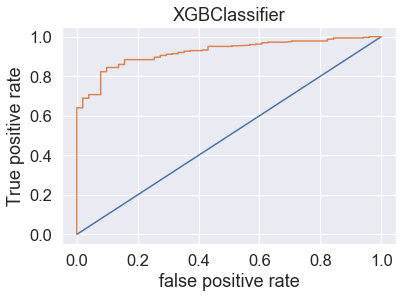

roc_auc_score =  0.9232723577235772


In [105]:
# Make predictions with probabilities
y_probs = xg.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='XGBClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('XGBClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

[[  8  43]
 [  4 324]]


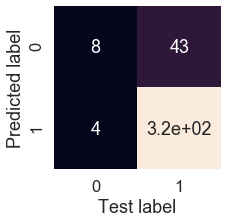

In [106]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, predgxg):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, predgxg),
                     annot=True,
                     cbar=False)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, predgxg)
print(confusion_matrix(y_test, predgxg))

In [107]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=predgxg
test
# On the lest side values are those fields which are taken by machine for test...

quality  Predicted values
112         1                 1
1076        1                 1
521         1                 1
137         1                 1
1239        1                 1
...       ...               ...
434         1                 1
648         0                 1
1292        1                 1
1498        1                 1
589         0                 1

[379 rows x 2 columns]

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (quality) 

In [84]:
# Find feature importance of our best model
xg.feature_importances_

array([0.03381276, 0.194332  , 0.07940371, 0.06357206, 0.01583637,
       0.08697218, 0.0697481 , 0.12170797, 0.04801489, 0.1371184 ,
       0.1494815 ], dtype=float32)

In [85]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=28):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()



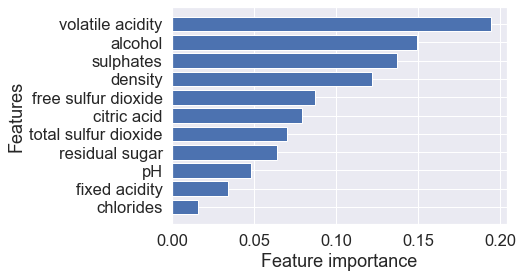

In [86]:
#bar plot of important features 
plot_features(x_train.columns, xg.feature_importances_)
#Looks like Contract contribute the most.

In [87]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(knnpred)
df1.to_csv('Red_wine_submission.csv')

In [88]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(knn,'Red_wine_submission.pkl')

['Red_wine_submission.pkl']

In [89]:
#lets read the model using joblib
xgb_from_joblib=joblib.load('Red_wine_submission.pkl')
joblib_y_preds = xgb_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 94.20%
Precision: 1.00
Recall: 0.94
F1 score: 0.97


{'accuracy': 0.94, 'precision': 1.0, 'recall': 0.94, 'f1': 0.97}

# Conclusion:                                          
1) Decreasing Volatile acidity will increase quality
2) Adding more citric acid results in good quality.
3) Less Chlorides means good quality of wine.
4) Quality increases if ph value decreases. but ph value should not be reduced below a certain limit.
4) Adding Sulphates will increase wine quality.
5) Quality of wine increases if the wine contains more alcohol.

# Steps followed

1) Data Analysis.
2) EDA Analysis.
3) Best parameters are found using Gridsearch cv and applied to models.
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.
5) AUC ROC Curves are made for each model.
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.
7) XGBClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.
8) Predicted values are saved in Red_wine_submission.csv file.
9) Pickle file is named with Red_wine_submission.pkl 